## 什么是数据库

当我们可以遍历分享的资源后，我们要做的就是在每次遍历时，对比一下，把新的文件同步到自己的网盘里。

在这部分逻辑里，我们需要python进行文件是否已经同步过的检查逻辑。

就像之前说的，程序无外乎数据和逻辑。

在处理逻辑的过程中，我们需要告诉程序，那些是已经处理过的内容，那些是新的内容。

这些数据我们可以简单做一个变量来保存在内存里，可一旦程序停止，程序的内存空间就被清空，无法长时间记录（图中虚线的部分）

我们需要一个可以持久记录的，并且可以快速检索的工具，这就是数据库（磁盘内实线的部分）。

如下图所示，这里的数据库就像一个Excel文件一样，保存了一张张表，一条条记录的信息。

当然，数据库不单单可以像excel，还有其他的形式，下面一一介绍。


<div>
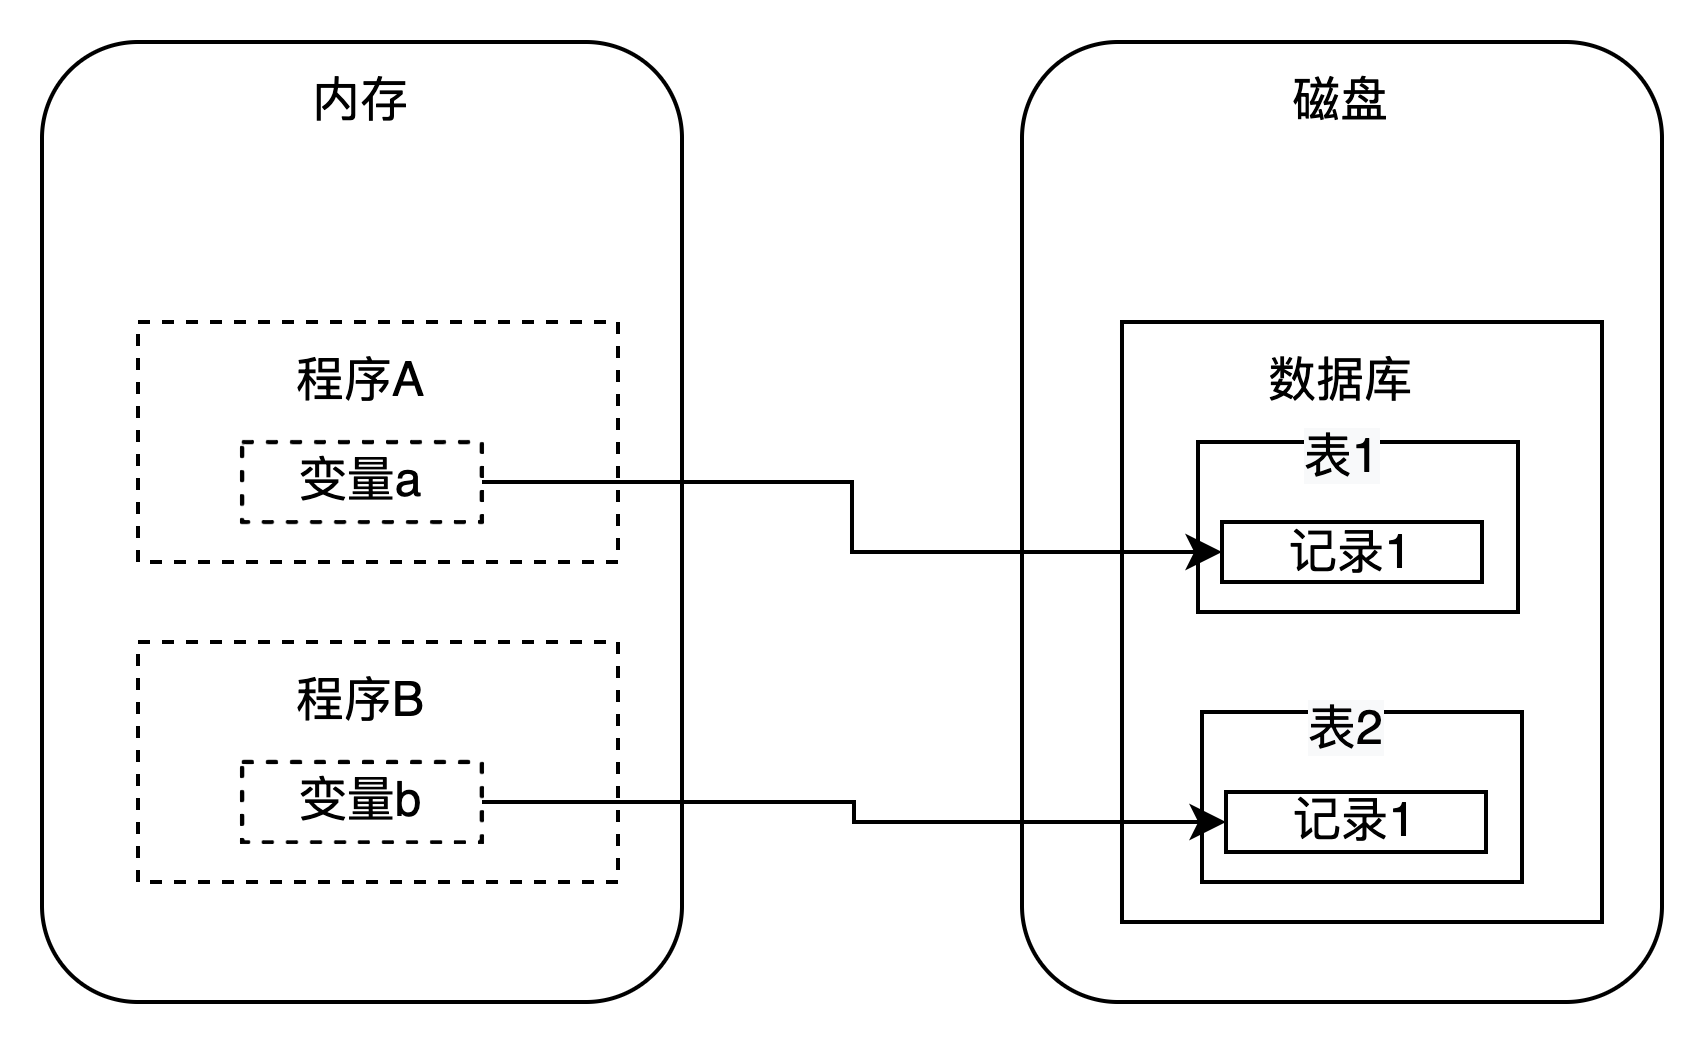
</div>

目前市面上的数据库主要分为两类
 - 关系型
 - 非关系型
 
简单的理解一下：

* ### 关系型数据库  
 
关系型数据库从主观感受上，就是类似于excel表的存储模式，可以分为不同的表格，每个表格有N行N列，每一列代表不同的数据属性，而每一行则代表每一条数据。

所以如果你直观感觉你的数据可以放到excel里存储，就可以直接使用关系型数据库。

关系型数据库主要可以选用sqlite 和mysql（MariaDB）

* ### 非关系型数据库  
 
非关系型数据库就是除去关系型数据库的其他数据库类型，这些数据一般没有很典型的行列关系，一般也不能使用表格的方式进行存储。

非关系型数据库存储的内容可以比较灵活，不受格式限制，根据不同场景的需求，有不同的分类：有文档类（MongoDB、CouchDB）、键值类（LevelDB）、时序类（InfluxDB）、搜索类（Elasticsearch）

### 数据库操作CRUD

数据库操作可以说是一个后端程序员的基础技能，行内黑话就是“CRUD”

CRUD其实是数据库基本操作中的Create(创建)、 Read Retrieve(读取)、Update（更新）、Delete（删除）

程序员必须会“CRUD”，但只会“CRUD”的肯定不是好的程序员。

言归正传，我们来看看我们再同步共享资源时，怎么来使用数据库。

首先我们考虑到我们只是记录每个文件的存储状态，当然，最简单的，我们可以用一张表格的方式来记录每个文件的状态，有文件名称、保存状态两个字段（两列），每一个文件就是一个记录（一行），如下所示：

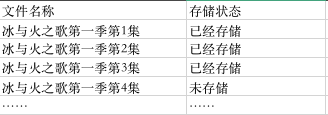


当然，如果只是有两列，为了简化，也可以选用键值类的数据库。

本节的最后，你可以选择使用sqlite（一种简化的关系型数据库）来实现本节的功能，但现在，我们可以试着先了解一下键值数据库看看

## 标准库中的键值数据库 dbm

这里就介绍一个标准库内的包，帮助我们快速完成键值对数据库的实现：dbm ，具体介绍可以看[这里](https://docs.python.org/zh-cn/3/library/dbm.html)

这里简单介绍下，dbm所提供的键值存储功能，其实就是一个保存在磁盘上类似字典的数据结构，用法就是这样：


```python
import dbm

with dbm.open('./db/tmp.db', 'c') as db:

    #创建一个记录
    db['a']= 'a'
    
    #更新一个记录
    db['a']= 'b'

    #查询记录是否存在（读取记录）
    v = db.get(k, None)
    
    #查询记录是否存在（读取记录）
    del db['a']
    #v = db.get(k, None)
    print(v)
    
```

唯一需要注意的是，它的键和值总是被存储为字节串，注意是`字节串`，而不是`字符串`。

关于`字节串`和`字符串`又是一个比较复杂而且不一定会用上的知识，如果你感兴趣，可以看我推荐的两个视频（[视频1](https://www.bilibili.com/video/BV1gZ4y1x7p7)，[视频2](https://www.bilibili.com/video/BV1XK4y1t7D4)）了解。

如果不感兴趣，你也可以就使用`字符串`，程序会在存储之前自动地转换至默认编码格式的`字节串`。

另外；因为涉及到硬盘读写，所以一般在open的方法之后，逻辑上必须还有个close方法，用来关闭我们对磁盘文件的操作。但我们使用with关键字，可以帮助我们更加简化的完成逻辑。
[with的作用具体可以参考这里](https://www.runoob.com/python3/python-with.html)  

下面你可以自己试试看

In [ ]:
import dbm

# open方法里的‘c’参数表示若找不到文件则创建一个新的。
with dbm.open('./db/tmp.db', 'c') as db:

    #创建一个记录
    db['a']= 'apple'

    #更新一个记录
    db['a']= 'banana'

    #查询记录是否存在（读取记录）
    v = db.get('a', None)#后面一个参数 None表示如果获取不到值则默认返回None

    #查询记录是否存在（读取记录）
    del db['a']
    #v = db.get('a', None)
    print(v)

你可能会发现，打印出来的值是这样的 `b'banana'`，最前面的`b`表示这是一个`字节串`（bytes），它和字符串不一样，需要像字符串一样使用的话，需要转换一下：

In [ ]:
s = str(v,encoding='utf-8')
print(s)

这样就可以作为字符串来进行其他操作了，不过如果你想深入了解`字节串`和`字符串`的区别，还是推荐看看这两个视频（[视频1](https://www.bilibili.com/video/BV1gZ4y1x7p7)，[视频2](https://www.bilibili.com/video/BV1XK4y1t7D4)）

接下来我们就可以实现给遍历的所有文件都做一个记录了，并且在我们的程序退出后，这些数据还能保存下来，下次再运行还能读取到。

让我在上一节的主要功能代码中，再加入保存和记录状态的功能：

我们加入了`exist_or_save()`函数。

这样就可以在之前我们实现的遍历函数里加入简单的一行，实现判断文件状态并保存的功能。

In [ ]:
from aligo import Aligo
ali = Aligo()

import dbm

all_files = []

#判断保存函数
def exist_or_save(share_id, share_token,file):

    filename = file.name
    file_id = file.file_id
    file_type = file.type
    
    # 打开一个以share_id命名的数据库文件。
    with dbm.open('./db/{}.db'.format(share_id), 'c') as db:
        
        #以share_id+file_id作为键值。
        k = share_id+file_id
        
        #判断键值是否存在
        v = db.get(k, None)
        if v:
            return True
        else:
            #不存在则存储，并保存file_id，
            save_file = ali.share_file_saveto_drive(share_id, file_id=file_id,
                            share_token=share_token, to_parent_file_id='root')

            #将保存后的fileid作为值 保存下来
            db[k]= save_file.file_id if save_file.file_id else None
            return False
        

#遍历函数
def tree_share(share_id, share_token, parent_file_id='root'):
    file_list = ali.get_share_file_list(share_id, share_token, parent_file_id=parent_file_id)
    
    
    for file in file_list:      
        all_files.append(pf + file.name)   
        print(pf + file.name)
        #调用函数，若没有保存就保存，已经保存就跳过。
        if exist_or_save(share_id,share_token,file):
            print("{}之前已经保存了！".format(file.name))
        else:
            print("{}是新的！完成保存！".format(file.name))
        
        if file.type == 'folder':
            pretty_tree_share(share_id, share_token, parent_file_id=file.file_id)
            
            
url = "https://www.aliyundrive.com/s/XsKj3F3HTSA"
r = ali.share_link_extract_code(url)
share_token = ali.get_share_token(r.share_id)
# tree_share(r.share_id, share_token)

这样就可以完成对分享内增量内容的保存了，但是注意，这里`share_file_saveto_drive()`方法中，有一个`to_parent_file_id` 参数，表示的是存储到自己网盘的那个文件内。

这里默认填的是'root'，这样，所有的文件会保存到我们的网盘最上级目录里。

所以如果我们想建立一个目录层级，就需要真实填写to_parent_file_id这个参数，而这个参数应该填写在我们网盘新生成的一个文件夹的id。

而每次在检查文件是否已经存储时，如果已经存储，就应该返回这文件在我们网盘的file_id。

而这个id就可以存储在我们的键值对数据库里。

稍微改造后，核心的部分会是像这样：

```python

def exist_or_save(share_id, share_token,file, drive_folder_id):
    #drive_folder_id就是当前自己网盘文件夹的fileid
    
    ......
    
    #判断键值是否存在
    v = db.get(k, None)
    if v:
        #如果存在，则返回file_id
        this_file_id = str(v,encoding='utf-8')
        
        #这里可以返回两个值，第一个是网盘保存的fileid，第二个是是否存在
        #在tree_share（）里的下一层递归，再把这个this_file_id参数带进去，
        #从而让下一级的文件保存时的drive_folder_id，可以用这个参数填写。
        return this_file_id, True
    else:
        #不存在则存储，并保存file_id
        if file_type == 'folder':
            save_file = ali.create_folder(name=filename, parent_file_id=drive_folder_id)
            print("create folder :",filename)
        else:
            save_file = ali.share_file_saveto_drive(share_id, file_id=file_id,
                        share_token=share_token, to_parent_file_id=drive_folder_id)
            print("save :",filename)
            
        db[k]= save_file.file_id if save_file.file_id else None
        this_file_id = str(db[k],encoding='utf-8')
        
        #这里可以返回两个值
        return this_file_id, False

```


好了，基本上主要的功能就能完成了，你可以自己修改并运行一下这些代码看看，看看能不能实现根据文件夹层级来保存文件。

下一节就是最后一节了，我们会把我们的信息发给我们自己的邮箱，通知我们都同步了什么。
